# $\Psi^\text{0}$

$\phi_l(|\vec{r}|)=\sum\limits_{n=1}^{n_l}c^{(l)}_n|\vec{r}|^{(l)}e^{-\gamma^{(l)}_n\vec{r}^2}$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm,colorbar,colors
from matplotlib.ticker import FormatStrFormatter
from matplotlib.collections import LineCollection

def psiL(r,l,widths,coeffs):
    psi = np.array([coeffs[n]*r**l*np.exp(-widths[n]*r**2) 
                    for n in range(min(len(coeffs),len(widths))) ])
    return np.sum(psi)

deut_expansion = [ float(li) for li in open('COEFF') ]
clean_wrels = [ float(li) for li in open('w0.dat') ]
print('dim(deuteron) = ',len(deut_expansion))
print('anz(w0_clean) = ',len(clean_wrels))

suffix = 'sI15'

('dim(deuteron) = ', 11)
('anz(w0_clean) = ', 9)


determine $c_1,\ldots,c_{n_s},c_{n_s+1},\ldots,c_{n_s+n_d}$ from
$\texttt{inen_b}$

In [2]:
inen = [line for line in open('inen_b')]
Sindices = np.nonzero(np.array(inen[6].split()).astype(int))
Dindices = np.nonzero(np.array(inen[8].split()).astype(int))
Swidths = np.take(clean_wrels,Sindices)[0]
Dwidths = np.take(clean_wrels,Dindices)[0]
print('S-wave dim(deuteron) = ',len(Sindices[0]))
print('D-wave dim(deuteron) = ',len(Dindices[0]))

('S-wave dim(deuteron) = ', 9)
('D-wave dim(deuteron) = ', 2)


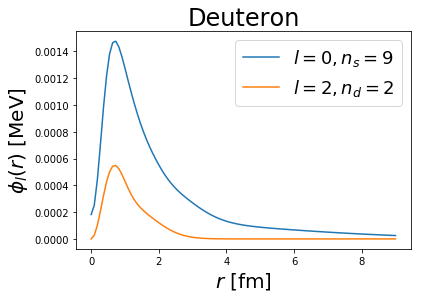

In [3]:
rspace = np.linspace(0,9,100)

wfktS = [ psiL(rr,0,Swidths,deut_expansion) for rr in rspace ]
wfktD = [ psiL(rr,2,Dwidths,deut_expansion[len(Swidths):]) for rr in rspace ]

plt.subplot(111)
t = plt.title(r'Deuteron', fontsize=24)
plt.xlabel(r'$r$ [fm]', fontsize=20)
plt.ylabel(r'$\phi_l(r)$ [MeV]', fontsize=20)

plt.plot(rspace, wfktS, label='$l=0, n_s=%d$'%len(Swidths))
plt.plot(rspace, wfktD, label='$l=2, n_d=%d$'%len(Dwidths))

plt.legend(loc='best', numpoints=1, fontsize=18)

strFile = 'DEUT_waveFkt_%s.pdf'%suffix
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile)
plt.savefig(strFile)

plt.show()

# $\Psi^\text{LIT}$

$$\psi_{0^-}(|\vec{r}|)=\sum\limits_{n}\phi_n^{l=1}$$
see $\texttt{bridge.py}$ for the specific form of the state

In [4]:
nl = 1
sigma = [ s for s in open('sRange') ]
sR = np.array(sigma[1].split(';')).astype(float)
ns = len(sR)
sI = float(sigma[0])
lit_wrels = [ float(li) for li in open('wLIT.dat') ]
nw = len(lit_wrels)
litcoeffs00 = np.array([ complex(float(litc.split(';')[0]),
                      float(litc.split(';')[1])) for litc in
                        open("COEFFS_LIT_J0mJ0")])
print('|Re[sigma]| = %d'%ns)
print('|w(LIT)|    = %d'%nw)
print('|COEFFs|    = %d'%len(litcoeffs00))
litcoeffs00 = np.reshape(litcoeffs00,(len(sR),-1))

|Re[sigma]| = 100
|w(LIT)|    = 18
|COEFFs|    = 1800


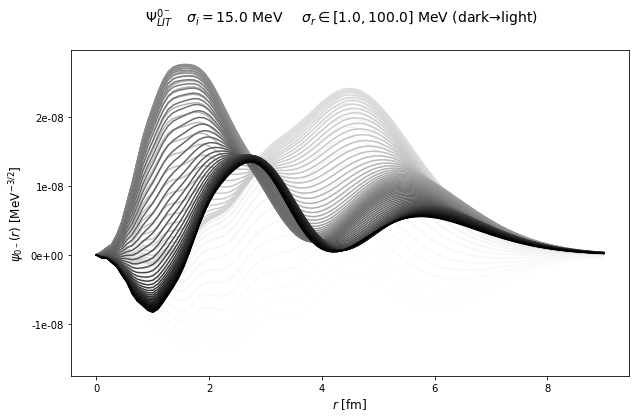

In [5]:
rspace = np.linspace(0,9,100)

wfktJ0 = [[ psiL(rr,1,lit_wrels,np.real(litcoeff)) for rr in rspace ]
          for litcoeff in litcoeffs00 ]

f = plt.figure(figsize=(10,6))
f.suptitle(r'$\Psi_{LIT}^{0^-}\;\;\;\;\sigma_i=%2.1f$ MeV $\;\;\;\;\sigma_r\in[%2.1f,%2.1f]$ MeV (dark$\to$light)'%(sI,float(sR[0]),float(sR[-1])), fontsize=14)

ax1 = f.add_subplot(111)
colormap = cm.Greys(np.linspace(0, 1, len(wfktJ0)))

ax1.set_xlabel(r'$r$ [fm]', fontsize=12)
ax1.set_ylabel(r'$\psi_{0^-}(r)$ [MeV$^{-3/2}$]', fontsize=12)

[ ax1.plot(rspace, wfktJ0[wfkt],
           label='$\sigma_r=%4.2f, n=%d$'
           %(float(sR[wfkt]),nw),c=colormap[wfkt])
 for wfkt in range(len(wfktJ0)) ]

ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0e'))
#plt.legend(loc='center left', numpoints=1, fontsize=18,
#           bbox_to_anchor=(1.1, .4))
strFile = 'LIT_waveFkt_J0_%s.pdf'%suffix
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile)
plt.savefig(strFile)

plt.show()

$\psi_{1^-}(|\vec{r}|)=\sum\limits_{n}\phi_n^{l=1}$

In [6]:
nl = 1
litcoeffs10 = np.array([ complex(float(litc.split(';')[0]),
                      float(litc.split(';')[1])) for litc in open("COEFFS_LIT_J1mJ0")])
print('|Re[sigma]| = %d'%ns)
print('|w(LIT)|    = %d'%nw)
print('|COEFFs|    = %d'%len(litcoeffs10))
litcoeffs10 = np.reshape(litcoeffs10,(len(sR),-1))
print('coeff shape: ',np.shape(litcoeffs10))

|Re[sigma]| = 100
|w(LIT)|    = 18
|COEFFs|    = 1800
('coeff shape: ', (100, 18))


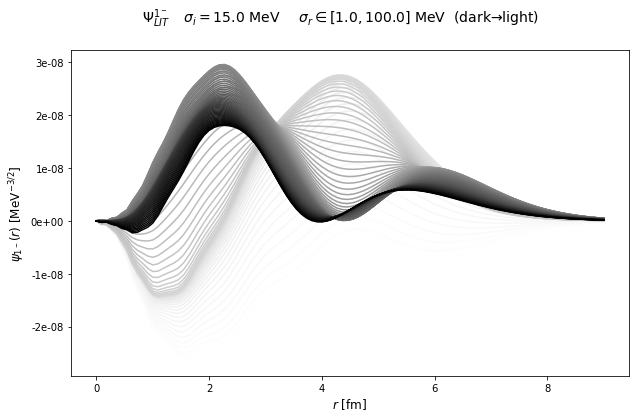

In [7]:
rspace = np.linspace(0,9,100)

wfktJ1 = [[ psiL(rr,1,lit_wrels,np.real(litcoeff)) for rr in rspace ]
          for litcoeff in litcoeffs10 ]

f = plt.figure(figsize=(10,6))
f.suptitle(r'$\Psi_{LIT}^{1^-}\;\;\;\;\sigma_i=%2.1f$ MeV $\;\;\;\;\sigma_r\in[%2.1f,%2.1f]$ MeV  (dark$\to$light)'%(sI,float(sR[0]),float(sR[-1])), fontsize=14)
ax1 = f.add_subplot(111)
colormap = cm.Greys(np.linspace(0, 1, len(wfktJ0)))

ax1.set_xlabel(r'$r$ [fm]', fontsize=12)
ax1.set_ylabel(r'$\psi_{1^-}(r)$ [MeV$^{-3/2}$]', fontsize=12)

[ ax1.plot(rspace, wfktJ1[wfkt],
        label='$\sigma_r=%4.2f, n=%d$'
           %(float(sR[wfkt]),nw),c=colormap[wfkt])
 for wfkt in range(len(wfktJ1)) ]

ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0e'))

#plt.legend(loc='center left', numpoints=1, fontsize=18,
#           bbox_to_anchor=(1.1, .4))
strFile = 'LIT_waveFkt_J1_%s.pdf'%suffix
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile)
plt.savefig(strFile)
plt.show()

$\psi_{2^-}(|\vec{r}|)=\sum\limits_{n}\phi_n^{l=1}+\phi_n^{l=3}$

$$
\left.
\begin{bmatrix}
\left.
\begin{bmatrix}
\left.\begin{bmatrix}
c_{\gamma_1}^{l_1}\\
\vdots\\
c_{\gamma_{n_w}}^{l_1}
\end{bmatrix}~\right\rbrace~n_w\\
\vdots\\
\left.\begin{bmatrix}
c_{\gamma_1}^{l_{n_l}}\\
\vdots\\
c_{\gamma_{n_w}}^{l_{n_l}}
\end{bmatrix}~\right\rbrace~n_w
\end{bmatrix}
~\right\rbrace_{\sigma_1}~n_w\cdot n_l\\
\vdots\\
\left.
\begin{bmatrix}
\left.\begin{bmatrix}
c_{\gamma_1}^{l_1}\\
\vdots\\
c_{\gamma_{n_w}}^{l_1}
\end{bmatrix}~\right\rbrace~n_w\\
\vdots\\
\left.\begin{bmatrix}
c_{\gamma_1}^{l_{n_l}}\\
\vdots\\
c_{\gamma_{n_w}}^{l_{n_l}}
\end{bmatrix}~\right\rbrace~n_w
\end{bmatrix}
~\right\rbrace_{\sigma_{n_\sigma}}~n_w\cdot n_l
\end{bmatrix}
~\right\rbrace~n_w\cdot n_l\cdot n_\sigma
$$

In [8]:
nl = 2
litcoeffs20 = np.array([ complex(float(litc.split(';')[0]),
                      float(litc.split(';')[1])) for litc in
                        open("COEFFS_LIT_J2mJ0")])
print('|Re[sigma]| = %d'%ns)
print('|w(LIT)|    = %d'%nw)
print('|COEFFs|    = %d'%len(litcoeffs20))
litcoeffs20 = np.reshape(litcoeffs20,(len(sR),-1))
print('coeff shape: ',np.shape(litcoeffs20))
Pcoffs = np.transpose([ litcoeffs20[:,n] for n in range(0,nw*nl,2) ])
Fcoffs = np.transpose([ litcoeffs20[:,n] for n in range(1,nw*nl,2) ])
print(np.shape(Pcoffs),np.shape(Fcoffs))

|Re[sigma]| = 100
|w(LIT)|    = 18
|COEFFs|    = 3600
('coeff shape: ', (100, 36))
((100, 18), (100, 18))


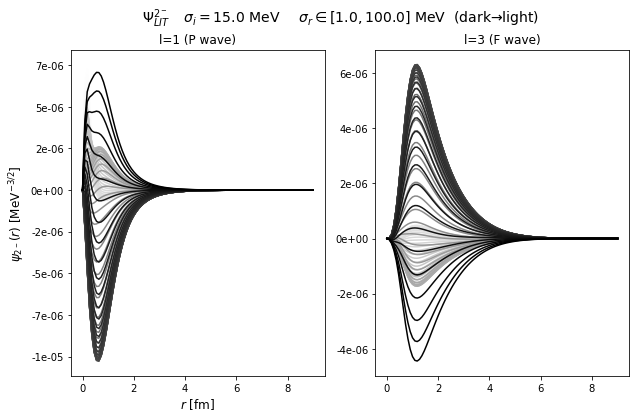

In [9]:
wfktJ2l1 = [[ psiL(rr,1,lit_wrels,np.real(litcoeff)) 
             for rr in rspace ]
             for litcoeff in Pcoffs ]
wfktJ2l3 = [[ psiL(rr,3,lit_wrels,np.real(litcoeff)) 
             for rr in rspace ]
             for litcoeff in Fcoffs ]

f = plt.figure(figsize=(10,6))
f.suptitle(r'$\Psi_{LIT}^{2^-}\;\;\;\;\sigma_i=%2.1f$ MeV $\;\;\;\;\sigma_r\in[%2.1f,%2.1f]$ MeV  (dark$\to$light)'%(sI,float(sR[0]),float(sR[-1])), fontsize=14)
ax1 = f.add_subplot(121)
colormap = cm.Greys(np.linspace(0, 1, len(wfktJ0)))
ax1.set_title('l=1 (P wave)')
ax1.set_xlabel(r'$r$ [fm]', fontsize=12)
ax1.set_ylabel(r'$\psi_{2^-}(r)$ [MeV$^{-3/2}$]', fontsize=12)

[ ax1.plot(rspace,     wfktJ2l1[wfkt],c=colormap[wfkt])
 for wfkt in range(len(wfktJ2l1)) ]
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0e'))

ax2 = f.add_subplot(122)
ax2.set_title('l=3 (F wave)')

[ ax2.plot(rspace, wfktJ2l3[wfkt],
        label='$\sigma_r=%4.2f, n=%d$'
           %(float(sR[wfkt]),nw),c=colormap[wfkt])
 for wfkt in range(len(wfktJ2l3)) ]

#plt.legend(loc='center left', numpoints=1, fontsize=18,
#           bbox_to_anchor=(1.1, .4))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%1.0e'))


strFile = 'LIT_waveFkt_J2_%s.pdf'%suffix
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile)
plt.savefig(strFile)

plt.show()